In [2]:
import sys, os
import boto3
from datetime import datetime as dt
import git
repo = git.Repo('.', search_parent_directories=True).working_tree_dir
if repo not in sys.path: sys.path.append(repo)
from easi_tools import EasiDefaults


In [57]:
userid = boto3.client('sts').get_caller_identity()['UserId']
print(userid)

AROA4YF43ZWIU6TNXUYDM:dhnghia


In [58]:
client = boto3.client('s3')
easi = EasiDefaults()
bucket = easi.scratch

Successfully found configuration for deployment "asia"


In [59]:
response = client.list_objects_v2(Bucket=bucket, Prefix=f'{userid}/')

# from pprint import pprint
# pprint(response)

# List each key with its last modified time stamp
if 'Contents' in response:
    for c in response['Contents']:
        key = c['Key']
        lastmodified = c['LastModified'].strftime('%Y-%d-%m %H:%M:%S')
        size = c['Size']
        print(f'{lastmodified}\t{size} {key}')

2023-12-10 07:30:54	4946225926 AROA4YF43ZWIU6TNXUYDM:dhnghia/example/Sen1_VHVV.zip
2023-17-10 01:11:38	5337416259 AROA4YF43ZWIU6TNXUYDM:dhnghia/example/Sen1_VHfull.tif
2023-17-10 01:29:14	5337416259 AROA4YF43ZWIU6TNXUYDM:dhnghia/example/Sen1_VVfull.tif


In [18]:
paginator = client.get_paginator('list_objects_v2')
page_iterator = paginator.paginate(Bucket=bucket, Prefix=f'{userid}/')

for response in page_iterator:
    if 'Contents' in response:
        for c in response['Contents']:
            key = c['Key']
            lastmodified = c['LastModified'].strftime('%Y-%d-%m %H:%M:%S')
            psize = c['Size']
            print(f'{lastmodified}\t{size} {key}')

2023-12-10 07:30:54	5337416259 AROA4YF43ZWIU6TNXUYDM:dhnghia/example/Sen1_VHVV.zip
2023-17-10 01:11:38	5337416259 AROA4YF43ZWIU6TNXUYDM:dhnghia/example/Sen1_VHfull.tif
2023-17-10 01:29:14	5337416259 AROA4YF43ZWIU6TNXUYDM:dhnghia/example/Sen1_VVfull.tif


In [ ]:
s3_key = "AROA4YF43ZWIU6TNXUYDM:dhnghia/example/Sen1_VVfull.tif" #path file

In [ ]:
response = s3.get_object(Bucket=bucket, Key=s3_key)
data = response['Body'].read()

In [ ]:
client.download_file(bucket, s3_key, "Sen1_VVfull.tif")

In [ ]:
client.close()

In [3]:
import rasterio
import datacube
from datacube.utils.cog import write_cog
import rasterio.warp

In [4]:
VH_file = "Sen1_VHfull.tif"
VV_file = "Sen1_VVfull.tif"

In [92]:
with rasterio.open(VH_file) as src:
    # Truy cập các thuộc tính của file TIFF
    vh_width = src.width
    vh_height = src.height
    vh_count = src.count  # Số lớp dữ liệu
    vh_crs = src.crs  # Hệ tọa độ
    vh_transform = src.transform  # Ma trận biến đổi

    # Đọc dữ liệu từ file TIFF
    vh_data = src.read()

In [90]:
with rasterio.open(VV_file) as src:
    # Truy cập các thuộc tính của file TIFF
    vv_width = src.width
    vv_height = src.height
    vv_count = src.count  # Số lớp dữ liệu
    vv_crs = src.crs  # Hệ tọa độ
    vv_transform = src.transform  # Ma trận biến đổi

    # Đọc dữ liệu từ file TIFF
    vv_data = src.read()

In [76]:
vh_data = vh_data.astype('float64')

In [85]:
import rasterio.features
with rasterio.open(VV_file) as src:
    data = src.dataset_mask()
    for geom, val in rasterio.features.shapes(
            data, transform=src.transform):

        # Transform shapes from the dataset's own coordinate
        # reference system to CRS84 (EPSG:4326).
        geom = rasterio.warp.transform_geom(
            src.crs, 'EPSG:32648', geom, precision=6)

        # Print GeoJSON shapes to stdout.
        print(geom)

{'type': 'Polygon', 'coordinates': [[[559670.0, 1098700.0], [559670.0, 1021900.0], [646540.0, 1021900.0], [646540.0, 1098700.0], [559670.0, 1098700.0]]]}


In [94]:
src = rasterio.open(VH_file)

In [95]:
d = src.read(1)

Warning 1: TIFFReadDirectory:Invalid data type for tag StripByteCounts
Warning 1: TIFFFetchNormalTag:ASCII value for tag "GeoASCIIParams" contains null byte in value; value incorrectly truncated during reading due to implementation limitations
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


In [98]:
d

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
vh_crs

CRS.from_epsg(32648)

In [64]:
vh_height

7680

In [65]:
vh_width

8687

In [67]:
vh_data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
type(vv_data)

numpy.ndarray

In [53]:
vh_transform

Affine(10.0, 0.0, 559669.9999999985,
       0.0, -10.0, 1098700.0)

In [ ]:
vv_data

In [5]:
src = rasterio.open(VH_file)

In [19]:
array = src.read(9)

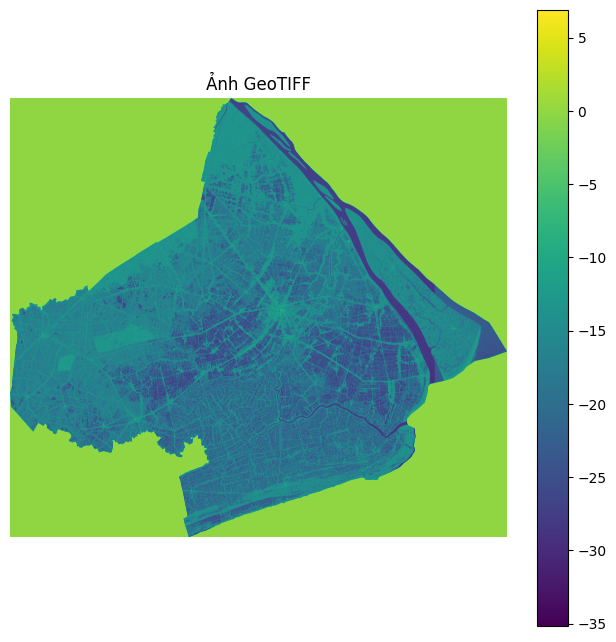

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))  # Tùy chỉnh kích thước hiển thị
plt.imshow(array)  # Tùy chỉnh colormap (bảng màu)
plt.colorbar()  # Hiển thị thanh màu
plt.title("Ảnh GeoTIFF")  # Đặt tiêu đề cho ảnh
plt.axis('off')  # Tắt trục x và y nếu bạn muốn

# Hiển thị ảnh
plt.show()





